# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 4. Визуализация данных: часть 1

Импортируем библиотеки `numpy` и `pandas` с сокращённым названием:

In [1]:
import numpy as np
import pandas as pd

## Часть 1: вспоминаем распределения и изучаем скошенность

Воспользуемся библиотекой `numpy` для того, чтобы сгенерировать выборки объёма $n=100$ из трёх различных распределений:

* стандартного нормального;
* экспоненциального с $\beta=1$;
* смешанного: к выборке из стандартного нормального добавляем значения –5, –10 и –12.

Так как выборки у всех будут генерироваться разные за счёт случайности (псевдослучайности) выбора, для воспроизводимости результатов зафиксируем стартовую точку алгоритма `seed`, равную 999 (это может быть любое целое неотрицательное число, главное, что если оно у всех одинаковое, выборки тоже будут одинаковы).

In [2]:
np.random.seed(999)

# три выборки sample объема 100

sample_norm = np.random.normal(size = 100)
sample_exp = np.random.exponential(size = 100)
sample_skewed = np.append(np.random.normal(size = 94), 
                          np.array([-5, -5, -10, -10, -10, -12]))

> **Пояснения к коду.** В `numpy` есть модуль `random` для имитации случайного выбора и генерации выборок из различных распределений. Функция `normal()` извлекает выборку фиксированного объема `size` из нормального распределения с известным математическим ожиданием и стандартным отклонением (аргументы `loc` и `scale` соответственно). По умолчанию `loc` равен 0, а `scale` – 1, что соответствует стандартному нормальному распределению. С экспоненциальным распределением похожая история. Функция `exponential()` генерирует случайную выборку из этого распределения, параметр распределения `beta` по умолчанию равен 1, поэтому мы его не добавляем. А вот в последнем случае мы генерируем выборку из стандартного нормального распределения размера 94, а затем «приклеиваем» к ней нехарактерные значения. Выполняем это действие с помощью функции `append()` из `numpy`, она выполняет объединение массивов. Оператор `+`, который подошел бы для двух списков, тут не годится, поскольку он будет выполнять поэлементное сложение элементов двух массивов.

Объединим эти выборки в один датафрейм по столбцам (для этого и генерировали выборки одинакового размера, чтобы без проблем получить таблицу из 100 строк):

In [3]:
df = pd.DataFrame({"s1" : sample_norm, "s2" : sample_exp, 
                   "s3" : sample_skewed})
df.head(10)

,s1,s2,s3
0,0.127158,0.659916,-0.578383
1,1.401891,1.069682,-0.791310
2,0.314815,2.720017,1.068553
3,-0.858449,0.783343,-0.500550
4,-0.266134,0.333437,0.895741
5,-0.648901,0.246681,-0.484718
6,1.566268,1.356177,0.086599
7,-2.091370,0.688116,-0.504001
8,1.456328,0.181994,1.638309
9,0.945293,3.200099,1.631034


Построим гистограммы для каждой выборки и прокомментируем форму распределения:

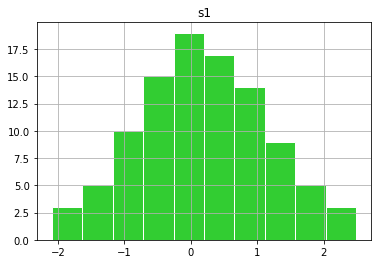

In [4]:
# из датафрейма df выбрать столбец s1
# color – цвет заливки
# edgecolor – цвет границ столбцов

df.hist("s1", color = "limegreen", edgecolor = "white");

> Распределение симметрично.

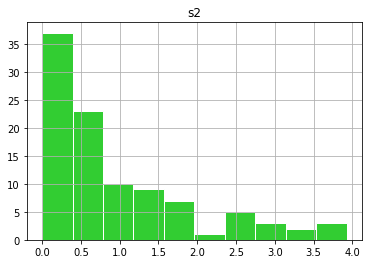

In [5]:
df.hist("s2", color = "limegreen", edgecolor = "white");

> Распределение скошено вправо.

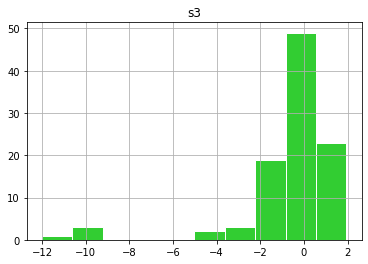

In [6]:
df.hist("s3", color = "limegreen", edgecolor = "white");

> Распределение скошено влево.

А теперь формально зафиксируем скошенность полученных распределений – вычислим коэффициент скошенности (*skewness*):

In [7]:
# округлим до второго знака

df.skew().round(2)

s1   -0.01
s2    1.35
s3   -3.17
dtype: float64

> Значение коэффициента скошенности (коэффициента асимметрии) может быть как положительным, так и отрицательным. Значения около 0 соответствуют симметричным распределениям, отрицательные – скошенным влево, положительные – скошенным вправо. Здесь все логично: у первой выборки коэффициент почти 0, у второй – положительный, у третьей – отрицательный, причем довольно большой по модулю (асимметрия считается сильной, поскольку здесь есть небольшое число нетипичных значений, сильно отдаленных от остальных).

Полезный и милый [пост](https://community.hellotriad.com/psychology/post/skewed-distributions-may-not-be-normal-but-they-don-t-have-to-be-iLrwghSXAY6QHdW) про скошенность и положение мер центральной тенденции при разных типах скошенности.

## Часть 2: строим гистограммы и столбиковые диаграммы

В этой части предлагается поработать с небольшой выгрузкой новостей с сайта [N+1](https://nplus1.ru/) за октябрь-ноябрь этого года. 

Переменные в файле `news.xlsx`:

* `title`: заголовок новости;
* `author`: автор новости;
* `date`: дата;
* `diffc`: сложность новости;
* `rubrics`: рубрики, к которым относится новость.

Загрузим данные из файла Excel:

In [8]:
news = pd.read_excel("news.xlsx")

### Задача 0

Выведите описательные статистики для всех столбцов датафрейма `news`. Прокомментируйте полученные результаты. При необходимости скорректируйте полученный датафрейм и сохраните изменения.

In [9]:
# числовой столбец один – сложность
news.describe()

,diffc
count,130.000000
mean,2.922308
std,1.387556
min,1.100000
25%,1.900000
50%,2.500000
75%,3.500000
max,7.300000


In [10]:
# почти все – текстовые
news.describe(include = "object")

,title,author,date,rubrics
count,130,130,130,130
unique,125,12,22,36
top,Орнитологи отправили камышовок в виртуальный Н...,Олег Лищук,2024-10-22,Медицина
freq,2,27,13,28


> **Проблема.** Заголовки у новостей всегда уникальные, а здесь в `title` число уникальных значений 125 из 130. В данном случае это означает только одно: в датафрейме есть несколько одинаковых строк. Чтобы от них избавиться, пригодится метод `.drop_duplicates()`, он удалит строки-дубликаты, оставив только один вариант повторяющейся строки.

In [11]:
# inplace = True, чтобы сохранить изменения в news

news.drop_duplicates(inplace = True)

### Задача 1

Постройте гистограмму для сложности новости, измените цвет её заливки и цвет границ столбцов.

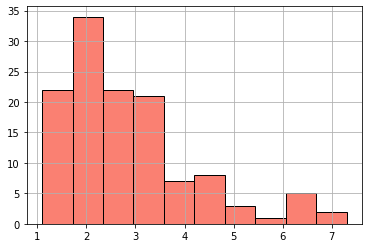

In [12]:
# вариант 1: применяем метод к столбцу
# k – сокращение от black, b занято цветом blue

news["diffc"].hist(color = "salmon", edgecolor = "k");

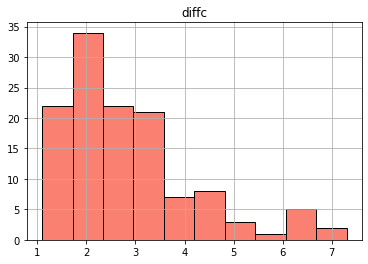

In [13]:
# вариант 2: применяем метод к датафрейму

news.hist("diffc", color = "salmon", edgecolor = "k");

### Задача 2

Измените у полученной гистограммы число столбцов, сделав его равным 5.

**Подсказка:** аргумент `bins`.

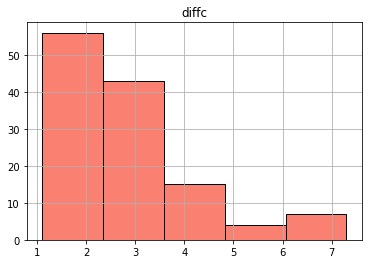

In [14]:
# подходит для любого варианта с hist() выше

news.hist("diffc", color = "salmon", edgecolor = "k", bins = 5);

### Задача 3

Измените у полученной гистограммы шаг (интервал группировки), сделав его равным выборочному стандартному отклонению.

**Подсказка:** все тот же аргумент `bins` и функция `arange()` из библиотеки `numpy`.

In [15]:
# создаем набор значений - границ столбцов
# так, будут столбцы одинаковой ширины равной std,
# от 0 до 1.365, от 1.365 до 2.73, итд

cutoffs = np.arange(0, 10, news["diffc"].std())
print(cutoffs)

[0.         1.36503574 2.73007149 4.09510723 5.46014297 6.82517872
 8.19021446 9.5552502 ]


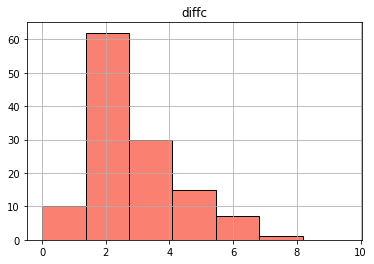

In [16]:
# подставляем в bins полученный набор

news.hist("diffc", color = "salmon", edgecolor = "k", bins = cutoffs);

### Задача 4

Выведите таблицу частот для столбца `author`. Постройте столбиковую диаграмму для этого показателя. Что нужно сделать, чтобы авторы на диаграмме были упорядочены по алфавиту?

In [17]:
news["author"].value_counts()

Олег Лищук          27
Михаил Подрезов     23
Слава Гоменюк       19
Сергей Коленов      15
Андрей Фокин        11
Марина Попова       10
Александр Войтюк     5
Катерина Петрова     5
Егор Конюхов         3
Михаил Бойм          3
Дмитрий Рудик        3
Винера Андреева      1
Name: author, dtype: int64

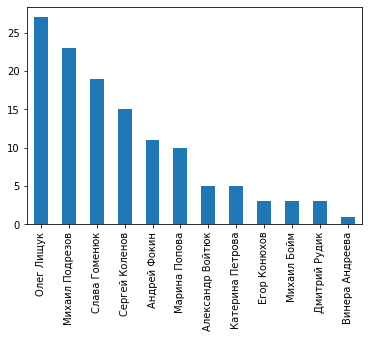

In [18]:
# метод plot.bar(), применяется к таблице с частотами, 
# не к исходному столбцу

news["author"].value_counts().plot.bar();

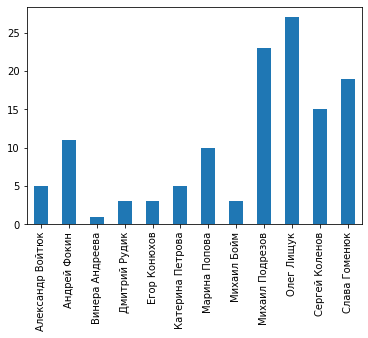

In [19]:
# чтобы упорядочить авторов по алфавиту, нужно предварительно отсортировать
# их в таблице частот, имена авторов = индексы

news["author"].value_counts().sort_index().plot.bar();

### Задача 5

* Выведите таблицу частот для столбца `rubrics`. 
* Разбейте столбец `rubrics` на столбцы с отдельными рубриками (рубрики разделены запятыми) и сохраните датафрейм из полученных столбцов с названием `rubs`. 

**Подсказка:** метод `str.split()`.

In [20]:
# есть перечни рубрик через запятую
news["rubrics"].value_counts()

Медицина                                 28
Зоология                                 12
Экология и климат                        10
Археология                                7
Антропология, Археология                  7
Физика                                    6
Астрономия                                5
Роботы и дроны                            5
Палеонтология                             4
Медицина, Психология                      4
Зоология, Экология и климат               3
Медицина, Биология                        3
Авиация                                   3
Химия                                     3
Космонавтика                              2
Биология, Медицина                        2
Биология, Зоология                        2
Антропология                              1
Экология и климат, Зоология               1
Математика                                1
Археология, История                       1
Медицина, Психология, Социология          1
Медицина, История               

In [21]:
# простое разбиение – получаем столбец со списками 
# в ячейках, неудобно в рамках pandas

news["rubrics"].str.split(",")

0                       [Зоология]
1                   [Космонавтика]
3                         [Физика]
4      [Антропология,  Археология]
5                       [Медицина]
                  ...             
125            [Экология и климат]
126    [Антропология,  Археология]
127                [Палеонтология]
128                     [Медицина]
129    [Антропология,  Археология]
Name: rubrics, Length: 125, dtype: object

In [22]:
# expand = True – растягиваем списки на отдельные столбцы,
# если рубрика одна, в двух последних столбцах None
# если рубрики две, в последнем столбце None

rubs = news["rubrics"].str.split(",", expand = True)
rubs

,0,1,2
0,Зоология,None,None
1,Космонавтика,None,None
3,Физика,None,None
4,Антропология,Археология,None
5,Медицина,None,None
...,...,...,...
125,Экология и климат,None,None
126,Антропология,Археология,None
127,Палеонтология,None,None
128,Медицина,None,None


> **Дополнительно.** Если полученные столбцы нам нужно добавить в `news` (сразу все), можем доклеить их справа через функцию `concat()` из `pandas`. По умолчанию функция выполняет объединение по строкам (второй датафрейм доклеивается к первому снизу), поэтому для объединения по столбцам (второй датафрейм доклеивается к первому справа) нужно добавить аргумент `axis=1` (0 – по строкам, 1 – по столбцам):

In [23]:
news2 = pd.concat([news, rubs], axis = 1)
news2.head(3)

,title,author,date,diffc,rubrics,0,1,2
0,Орнитологи отправили камышовок в виртуальный Н...,Сергей Коленов,2024-11-18,4.1,Зоология,Зоология,None,None
1,Шестой полет Starship перенесли на 20 ноября. ...,Андрей Фокин,2024-11-18,1.1,Космонавтика,Космонавтика,None,None
3,Механический резонатор стал кубитом. Приготовл...,Егор Конюхов,2024-11-18,5.3,Физика,Физика,None,None


### Задача 6

Выведите таблицу частот для первого столбца в `rubs`, сохраните ее в переменную `tab`. 

In [24]:
# нет текстовых названий, названия = индексы с 0

tab = rubs[0].value_counts()
tab

Медицина             39
Зоология             17
Экология и климат    11
Антропология          9
Археология            8
Роботы и дроны        7
Физика                6
Биология              5
Астрономия            5
Палеонтология         4
Авиация               3
Социология            3
Химия                 3
Космонавтика          2
Геология              1
История               1
Математика            1
Name: 0, dtype: int64

### Задача 7

Как можно заметить, в `tab` получилось довольно много категорий, причем некоторые из них довольно редкие (частота менее 5). Ниже приведен код для того, чтобы эти редкие категории «схлопнуть» в одну категорию *Другое*. 

In [25]:
# tab – объект pandas Series, один столбец таблицы,
# с парами индекс-значение (index-values), 
# значит, на его значения можно накладывать условия

tab[tab < 5]

Палеонтология    4
Авиация          3
Социология       3
Химия            3
Космонавтика     2
Геология         1
История          1
Математика       1
Name: 0, dtype: int64

In [26]:
# а у выбранных пар можно забрать только 
# названия категорий – index

tab[tab < 5].index

Index(['Палеонтология', 'Авиация', 'Социология', 'Химия', 'Космонавтика',
       'Геология', 'История', 'Математика'],
      dtype='object')

In [27]:
# пишем функцию, которая принимает название x,
# если оно в списке категорий выше, возвращает Другое,
# если нет – возращает само название x

get_other = lambda x: "Другое" if x in tab[tab < 5].index else x

# функцию помещаем в rename(), чтобы применить к tab
# inplace = True – сохраняем изменения

tab.rename(get_other, inplace = True)
tab

Медицина             39
Зоология             17
Экология и климат    11
Антропология          9
Археология            8
Роботы и дроны        7
Физика                6
Биология              5
Астрономия            5
Другое                4
Другое                3
Другое                3
Другое                3
Другое                2
Другое                1
Другое                1
Другое                1
Name: 0, dtype: int64

In [28]:
# замена произошла, но Другое теперь много раз, 
# надо сгруппировать и просуммировать частоты,
# здесь нет названий столбцов, есть только index (level = 0)

tab = tab.groupby(level = 0).sum()
tab

Антропология          9
Археология            8
Астрономия            5
Биология              5
Другое               18
Зоология             17
Медицина             39
Роботы и дроны        7
Физика                6
Экология и климат    11
Name: 0, dtype: int64

Постройте для обновленной таблицы частот `tab` столбиковую диаграмму таким образом, чтобы столбцы в ней были упорядочены от самого высокого к самому низкому.

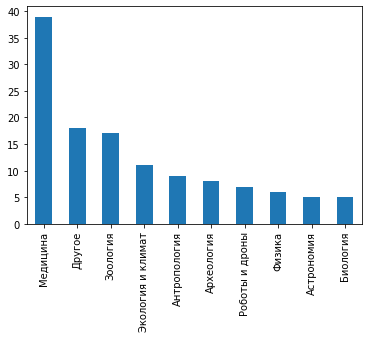

In [29]:
# сначала сортируем по убыванию (по значениям)

tab.sort_values(ascending=False).plot.bar();

**Дополнительно.** Для настройки цветов можно добавить аргумент `color`:

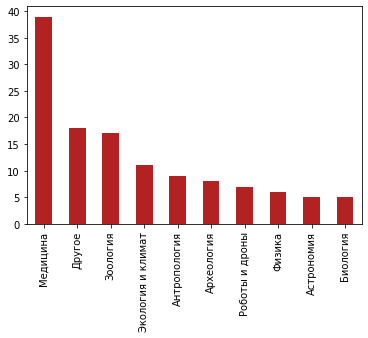

In [30]:
# один цвет
tab.sort_values(ascending=False).plot.bar(color = "firebrick");

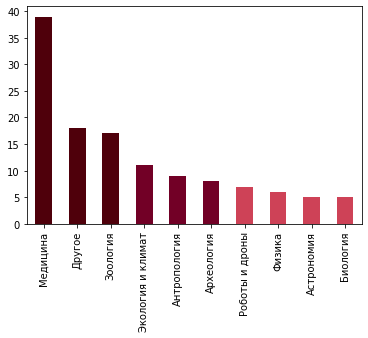

In [31]:
# несколько цветов, цвета списком
# здесь цвета в виде кодов HEX

tab.sort_values(ascending=False).plot.bar(color = ["#4f000b", "#4f000b", "#4f000b",
                                                   "#720026", "#720026", "#720026", 
                                                   "#ce4257", "#ce4257", "#ce4257", 
                                                   "#ce4257"]);

**Примечание 1.** Если цветов много, и они повторяются, как в примере выше, полезно вспомнить про свойства списков:

In [32]:
cols = ["#4f000b"] * 3 + ["#720026"] * 3 + ["#ce4257"] * 4
print(cols)

['#4f000b', '#4f000b', '#4f000b', '#720026', '#720026', '#720026', '#ce4257', '#ce4257', '#ce4257', '#ce4257']


**Примечание 2.** Если в списке цветов меньше, чем столбцов, после окончания списка Python начнет проходить его с начала:

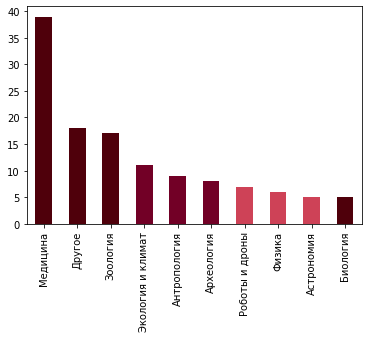

In [33]:
# 9 цветов вместо 10, последний столбец с первым цветом

tab.sort_values(ascending=False).plot.bar(color = ["#4f000b", "#4f000b", "#4f000b",
                                                   "#720026", "#720026", "#720026", 
                                                   "#ce4257", "#ce4257", "#ce4257"]);

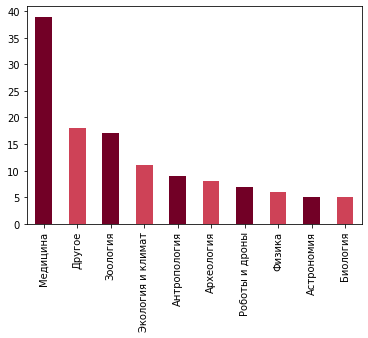

In [34]:
# этим можно пользоваться, если нужно чередование цветов

tab.sort_values(ascending=False).plot.bar(color = ["#720026", "#ce4257"]);